# Tokenize datasets into sentences

In [1]:
#imports
import pandas as pd
import os
import pickle
import ast
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
import matplotlib.pyplot as plt

#setup
FOLDER_NOVELS = os.path.join("not_scientific_novels")
FOLDER_THESIS = os.path.join("almost_scientific_thesis")
FOLDER_MEDIUM = os.path.join("almost_scientific_medium")
FOLDER_REPORTS = os.path.join("almost_scientific_reports")
FOLDER_ARXIV = os.path.join("scientific_arxiv")

In [2]:
def files_txt(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)) and file.endswith('.txt'):
            yield file

## Almost scientific - medium

In [30]:
df_medium = pd.read_csv(os.path.join(FOLDER_MEDIUM, "2021-01-January_export_scraper.csv"))
print("Overview")
print(f"{len(df_medium)} articles from towardsdatascience")
print(f"{df_medium.number_paragraphs.sum()} paragraphs from towardsdatascience")
print("? sentences -> see below")
print("\nDetails")
df_medium.head(2)

Overview
1565 articles from towardsdatascience
57856 paragraphs from towardsdatascience
? sentences -> see below

Details


,date,title,subtitle,claps,responses,author_url,story_url,reading_time (mins),number_sections,section_titles,number_paragraphs,paragraphs
0,2021-01-01,7 Most Recommended Skills to Learn in 2021 to ...,Recommended by some of the largest…,1K,10,https://towardsdatascience.com/@terenceshin,https://towardsdatascience.com/7-most-recommen...,6,11,['7 Most Recommended Skills to Learn in 2021 t...,36,"['Terence Shin', 'Jan 1·6 min read', 'Happy Ne..."
1,2021-01-01,Shakespeare versus Eminem— who’s the better ly...,"He is known for his poetry, his writings on life…",139,2,https://towardsdatascience.com/@jeroenvanzeeland,https://towardsdatascience.com/shakespeare-ver...,9,13,['Shakespeare versus Eminem—who’s the better l...,64,"['Jeroen van Zeeland', 'Jan 1·9 min read', 'Da..."


In [26]:
## Might be necessary, in case of an error in next cell:
# nltk.download('punkt')

In [31]:
# Testing how the sentence tokenizer is applied to the paragraphs from medium articles.
# This test shows, that every paragraphs has to be tokenized individually.

test = df_medium['paragraphs'][4]
test_list = ast.literal_eval(test)
for para in test_list[:5]:
    print(sent_tokenize(para), '\n')

['Soner Yıldırım'] 

['Jan 1·5 min read'] 

['Stock price analysis is an example of time series analysis which is one of the primary areas in predictive analytics.', 'Time series data contains measurements or observations attached to sequential time stamps.', 'In case of stock prices, the time stamps can be seconds, minutes, or days depending on the task.'] 

['This article is a practical guide that covers some basic and essential operations in stock price analysis.', 'We will be using Pandas for data manipulation and Altair for data visualization.', 'Both are Python libraries that are commonly used in data science.'] 

['There are many resources to get stock price data.', 'We will use the data reader API of Pandas.', 'We first import the dependencies.'] 



In [18]:
def process_article(article, skip_paragraphs):
    """
    Function to tokenize each paragraph of an article.
    """
    
    # string to list of paragraphs
    article = ast.literal_eval(article)
    sentence_list = []
    
    # remove author, date , title - This might cut of one paragraph too mu
    article = article[skip_paragraphs:]
    
    for para in article:
        sents = sent_tokenize(para)
        sentence_list.extend(sents)
        
    return sentence_list

In [29]:
df_medium['sentences'] = [process_article(article,2) for article in df_medium['paragraphs']]

In [31]:
idx = 4
print(df_medium['paragraphs'][idx], '\n\n\n',df_medium['sentences'][idx])

['Soner Yıldırım', 'Jan 1·5 min read', 'Stock price analysis is an example of time series analysis which is one of the primary areas in predictive analytics. Time series data contains measurements or observations attached to sequential time stamps. In case of stock prices, the time stamps can be seconds, minutes, or days depending on the task.', 'This article is a practical guide that covers some basic and essential operations in stock price analysis. We will be using Pandas for data manipulation and Altair for data visualization. Both are Python libraries that are commonly used in data science.', 'There are many resources to get stock price data. We will use the data reader API of Pandas. We first import the dependencies.', 'We can now use the data reader to create Pandas dataframes that contain stock price data.', 'We use the DataReader function to get the stock prices. The stock name, start and end dates, and the source are the required parameters.', 'This function returns a datafra

In [32]:
# Accumulating all sentences
all_sentences = []

for sentences in df_medium['sentences']:
    all_sentences.extend(sentences)
    
print(f'Number of sentences: {len(all_sentences)}')

Number of sentences: 118969


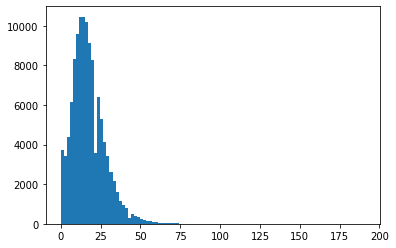

In [35]:
# Calculate length of sentences without punctuation
len_all_sentences = [len([word for word in word_tokenize(sent) if not word in string.punctuation]) for sent in all_sentences]

plt.hist(len_all_sentences, bins = 100)
plt.show()

In [36]:
# Some filtering

# A complete sentence needs at least S,V,O
all_sentences = [sent for i, sent in enumerate(all_sentences) if len_all_sentences[i] >= 3]
print(f'Number of sentences: {len(all_sentences)}')

Number of sentences: 113554


In [38]:
with open(os.path.join(FOLDER_MEDIUM, 'sentences.pickle'), 'wb') as fp:
    pickle.dump(all_sentences , fp)

## Almost scientific - our reports

In [3]:
sentence_list = []

# original datasource contains one file per paragraph
# to avoid uploading 10k files to Github, all of them were concatinated into one file using: cat *.txt > original.txt
# nevertheless, following code can be useful later
for file in files_txt(os.path.join(FOLDER_REPORTS, "processed")):
    with open(os.path.join(FOLDER_REPORTS, "processed", file), "r") as fp:
        text = fp.read()
        sentence_list.extend(sent_tokenize(text))

In [4]:
print(f"Number of documents: {len(list(files_txt(os.path.join(FOLDER_REPORTS, 'processed'))))}")
print(f"Number of sentences {len(sentence_list)}")

Number of documents: 35
Number of sentences 4682


Number of sentences before filtering: 4682


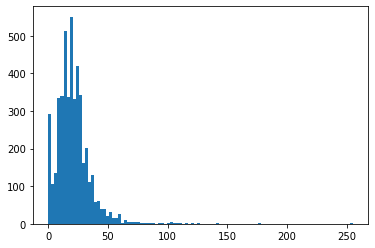

Number of sentences after filtering: 4389


In [5]:
print(f'Number of sentences before filtering: {len(sentence_list)}')

# Calculate length of sentences without punctuation
len_all_sentences = [len([word for word in word_tokenize(sent) if not word in string.punctuation]) for sent in sentence_list]
plt.hist(len_all_sentences, bins = 100)
plt.show()

# Some filtering
# A complete sentence needs at least S,V,O
sentence_list = [sent for i, sent in enumerate(sentence_list) if len_all_sentences[i] >= 3]
print(f'Number of sentences after filtering: {len(sentence_list)}')

In [6]:
with open(os.path.join(FOLDER_REPORTS, 'sentences.pickle'), 'wb') as fp:
    pickle.dump(sentence_list , fp)

## (won't do) Almost scientific - thesis

- first view on dataset showed: Main topics about agriculture and farming.
- todo: might need to do NER to check topics more thourougly. But, better keep to other datasets!

In [16]:
sentence_list = []

try:
    for file in files_txt(os.path.join(FOLDER_THESIS, "original")):
        with open(os.path.join(FOLDER_THESIS, "original", file), "r") as fp:
            print(file)
            text = fp.read()
            sentence_list.extend(sent_tokenize(text))
except UnicodeDecodeError as e:
    print(
"""
Error here due to an decode error (see below).
Won't continue thesis dataset due to this error and not relevant topic of thesis.
""")
    print(e)

merged.txt

Error here due to an decode error (see below).
Won't continue thesis dataset due to this error and not relevant topic of thesis.

'utf-8' codec can't decode byte 0xd5 in position 928: invalid continuation byte


## Scientific - arxiv

In [55]:
sentence_list = []

# original datasource contains one file per paragraph
# to avoid uploading 10k files to Github, all of them were concatinated into one file using: cat *.txt > original.txt
# nevertheless, following code can be useful later
for file in files_txt(os.path.join(FOLDER_ARXIV, "original")):
    with open(os.path.join(FOLDER_ARXIV, "original", file), "r") as fp:
        paragraphs = fp.read()
        paragraphs = paragraphs.strip()
        sentence_list.extend(sent_tokenize(paragraphs))

Number of sentences before filtering: 131569


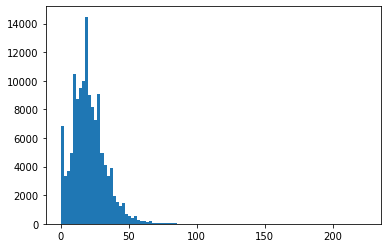

Number of sentences after filtering: 124755


In [56]:
print(f'Number of sentences before filtering: {len(sentence_list)}')

# Calculate length of sentences without punctuation
len_all_sentences = [len([word for word in word_tokenize(sent) if not word in string.punctuation]) for sent in sentence_list]
plt.hist(len_all_sentences, bins = 100)
plt.show()

# Some filtering
# A complete sentence needs at least S,V,O
sentence_list = [sent for i, sent in enumerate(sentence_list) if len_all_sentences[i] >= 3]
print(f'Number of sentences after filtering: {len(sentence_list)}')

In [57]:
with open(os.path.join(FOLDER_ARXIV, 'sentences.pickle'), 'wb') as fp:
    pickle.dump(sentence_list , fp)

## Non scientific - novels

In [36]:
sentence_list = []

# original datasource contains one file per paragraph
# to avoid uploading 10k files to Github, all of them were concatinated into one file using: cat *.txt > original.txt
# nevertheless, following code can be useful later
for file in files_txt(os.path.join(FOLDER_NOVELS, "original")):
    with open(os.path.join(FOLDER_NOVELS, "original", file), "r") as fp:
        text = fp.read()
        sentence_list.extend(sent_tokenize(text))

In [37]:
print(f"Number of documents: {len(list(files_txt(os.path.join(FOLDER_REPORTS, 'processed'))))}")
print(f"Number of sentences {len(sentence_list)}")

Number of documents: 6
Number of sentences 79784


Number of sentences before filtering: 79784


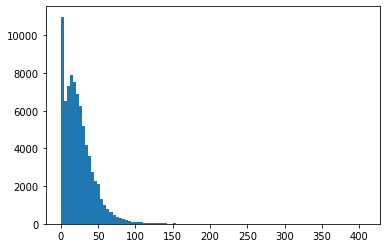

Number of sentences after filtering: 72239


In [38]:
print(f'Number of sentences before filtering: {len(sentence_list)}')

# Calculate length of sentences without punctuation
len_all_sentences = [len([word for word in word_tokenize(sent) if not word in string.punctuation]) for sent in sentence_list]
plt.hist(len_all_sentences, bins = 100)
plt.show()

# Some filtering
# A complete sentence needs at least S,V,O
sentence_list = [sent for i, sent in enumerate(sentence_list) if len_all_sentences[i] >= 3]
print(f'Number of sentences after filtering: {len(sentence_list)}')

In [39]:
with open(os.path.join(FOLDER_NOVELS, 'sentences.pickle'), 'wb') as fp:
    pickle.dump(sentence_list , fp)